In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

In [198]:
e2e_data = pd.read_csv('e2ebenchmark1.csv',header=0)
e2e_data['Label'] = 'End-to-End Experiments Dell XPS 15, Experiment 1'
e2e_data['plot_label'] = 'Dell XPS 15, Experiment 1'


e2e_data2 = pd.read_csv('e2ebenchmark2.csv',header=0)
e2e_data2['Label'] = 'End-to-End Experiments Dell Precision 7520'
e2e_data2['plot_label'] = 'Dell Precision 7520'

e2e_data3 = pd.read_csv('e2ebenchmark3.csv',header=0)
e2e_data3['Label'] = 'End-to-End Experiments Dell XPS 15, Experiment 2'
e2e_data3['plot_label'] = 'Dell XPS 15, Experiment 2'

rl_data = pd.read_csv('rl_benchmark1.csv',header=0)
rl_data['Label'] = 'RL Experiments Dell XPS 15, Experiment 1'
rl_data['plot_label'] = 'Dell XPS 15, Experiment 1'

rl_data2 = pd.read_csv('rl_benchmark2.csv',header=0)
rl_data2['Label'] = 'RL Experiments Dell Precision 7520'
rl_data2['plot_label'] = 'Dell Precision 7520'


rl_data3 = pd.read_csv('rl_benchmark3.csv',header=0)
rl_data3['Label'] = 'RL Experiments Dell XPS 15, Experiment 2'
rl_data3['plot_label'] = 'Dell XPS 15, Experiment 2'

e2e_data['controller_type'] = 'E2E'
e2e_data2['controller_type'] = 'E2E'
e2e_data3['controller_type'] = 'E2E'

rl_data['controller_type'] = 'RL'
rl_data2['controller_type'] = 'RL'
rl_data3['controller_type'] = 'RL'

In [199]:
merged_df = pd.concat([e2e_data,e2e_data2,e2e_data3])
merged_df = merged_df.rename(columns={"wcet":"moet"})
merged_df['moet'] = merged_df['moet'] *1000
merged_df['mean_reach_time'] = merged_df['mean_reach_time'] *1000
merged_df = merged_df[merged_df.moet>0].sort_values(by='Label')


merged_df2 = pd.concat([rl_data,rl_data2,rl_data3])
merged_df2 = merged_df2.rename(columns={"wcet":"moet"})
merged_df2['moet'] = merged_df2['moet'] *1000
merged_df2['mean_reach_time'] = merged_df2['mean_reach_time'] *1000
merged_df2 = merged_df2[merged_df2.moet>0].sort_values(by='Label')

combined = pd.concat([merged_df,merged_df2])

In [200]:
merged_df.head()

,time_string,time_taken_lec,time_taken_safety_controller,total_time,moet,mean_reach_time,Label,plot_label,controller_type
47,22/10/2020/13:27:45,1.409610,7.47175,15.7600,47.131,27.0538,End-to-End Experiments Dell Precision 7520,Dell Precision 7520,E2E
29,22/10/2020/13:04:00,1.247720,10.01380,15.9662,49.286,28.5481,End-to-End Experiments Dell Precision 7520,Dell Precision 7520,E2E
28,22/10/2020/13:02:45,0.620262,11.39450,16.0410,47.337,27.4139,End-to-End Experiments Dell Precision 7520,Dell Precision 7520,E2E
27,22/10/2020/13:01:33,0.543133,13.74320,16.8509,50.218,29.1652,End-to-End Experiments Dell Precision 7520,Dell Precision 7520,E2E
26,22/10/2020/13:00:22,0.425692,12.86860,15.8004,48.091,27.0030,End-to-End Experiments Dell Precision 7520,Dell Precision 7520,E2E


In [201]:
merged_df2.head()

,time_string,time_taken_lec,time_taken_safety_controller,total_time,moet,mean_reach_time,Label,plot_label,controller_type
43,22/10/2020/15:16:32,1.05707,31.29880,38.4664,43.886,30.5833,RL Experiments Dell Precision 7520,Dell Precision 7520,RL
27,22/10/2020/14:49:00,6.55015,12.82800,37.8412,53.760,30.3646,RL Experiments Dell Precision 7520,Dell Precision 7520,RL
26,22/10/2020/14:47:11,12.37600,12.67500,37.7808,53.845,30.2758,RL Experiments Dell Precision 7520,Dell Precision 7520,RL
25,22/10/2020/14:45:22,13.74580,4.06873,37.5023,37.872,30.3375,RL Experiments Dell Precision 7520,Dell Precision 7520,RL
24,22/10/2020/14:43:34,12.69140,6.28869,37.4624,54.609,30.2115,RL Experiments Dell Precision 7520,Dell Precision 7520,RL


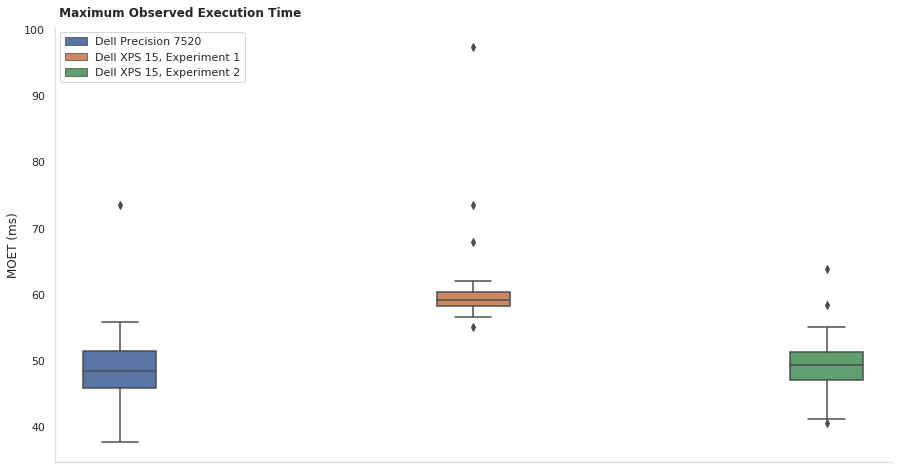

In [202]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=merged_df, x='plot_label',y='moet',hue='plot_label')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)


plt.xlabel('')
plt.ylabel('MOET (ms)')
plt.title(' Maximum Observed Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')

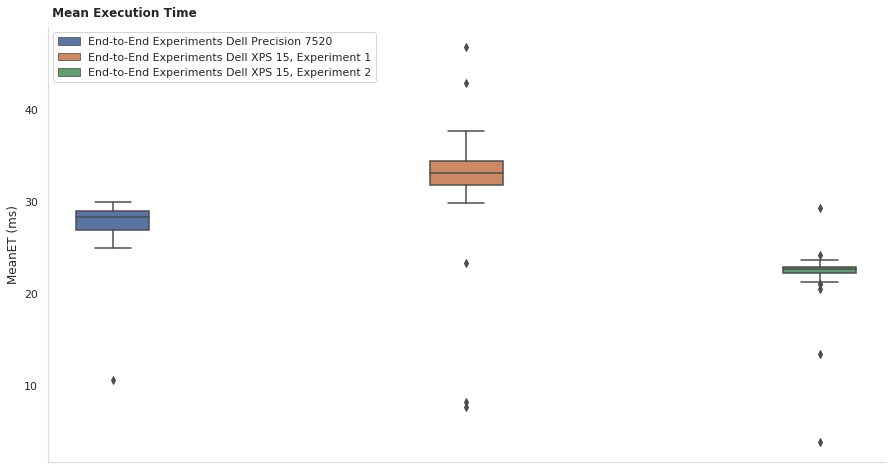

In [203]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=merged_df, x='plot_label',y='mean_reach_time',hue='Label')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)

plt.xlabel('')
plt.ylabel('MeanET (ms)')
plt.title(' Mean Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')

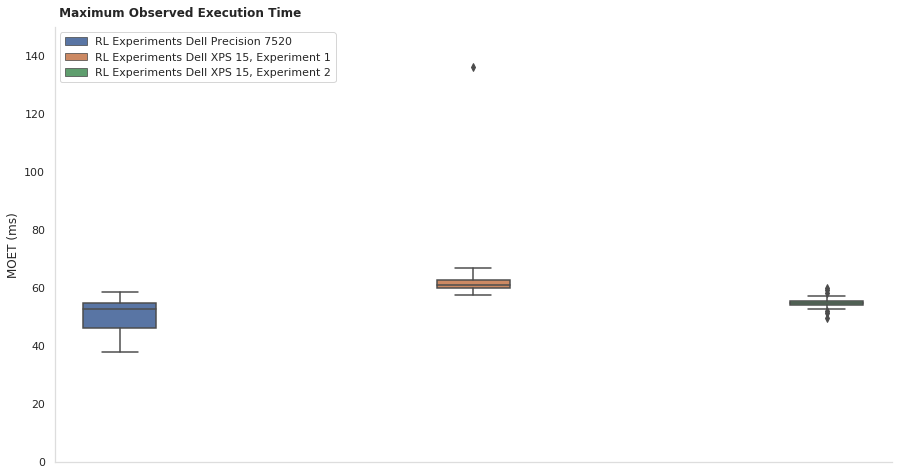

In [216]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=merged_df2, x='plot_label',y='moet',hue='Label')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)

plt.ylim(0,150)
plt.xlabel('')
plt.ylabel('MOET (ms)')
plt.title(' Maximum Observed Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')

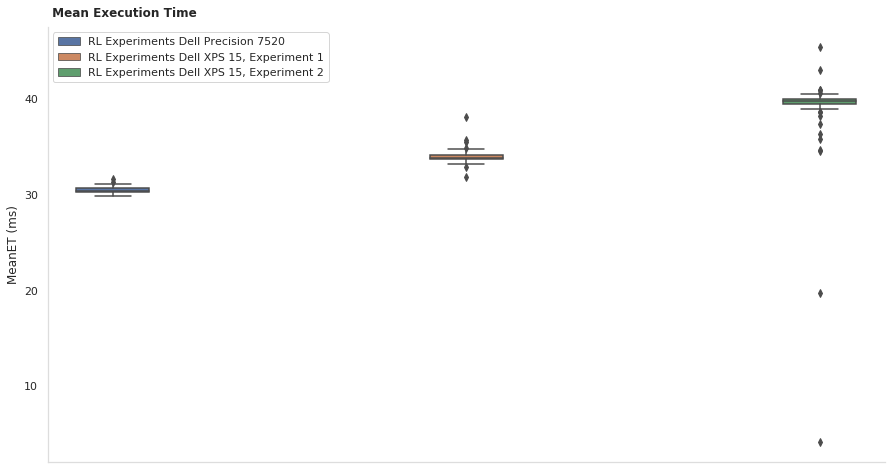

In [205]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=merged_df2, x='plot_label',y='mean_reach_time',hue='Label')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)

plt.xlabel('')
plt.ylabel('MeanET (ms)')
plt.title(' Mean Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')

(0, 50)

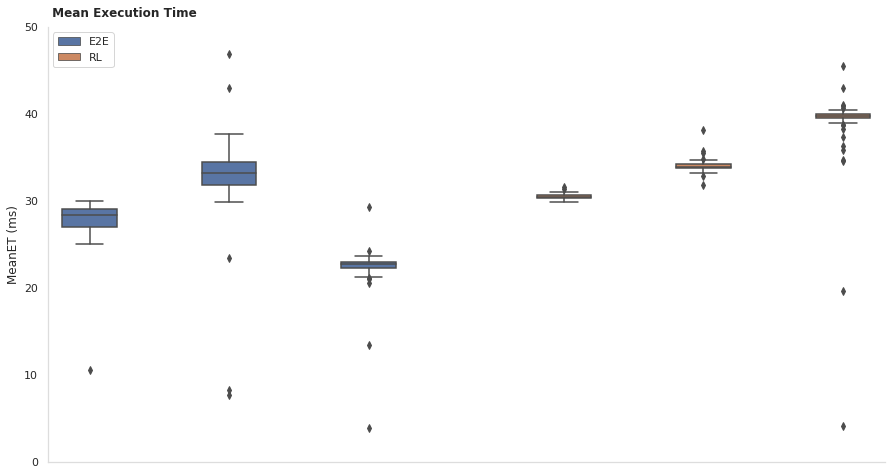

In [220]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=combined, x='Label',y='mean_reach_time',hue='controller_type')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
#ax.set(xticklabels=['Dell Precision 7520','2','3','4','5','6'])
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)

plt.xlabel('')
plt.ylabel('MeanET (ms)')
plt.title(' Mean Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')
plt.ylim(0,50)

(0, 150)

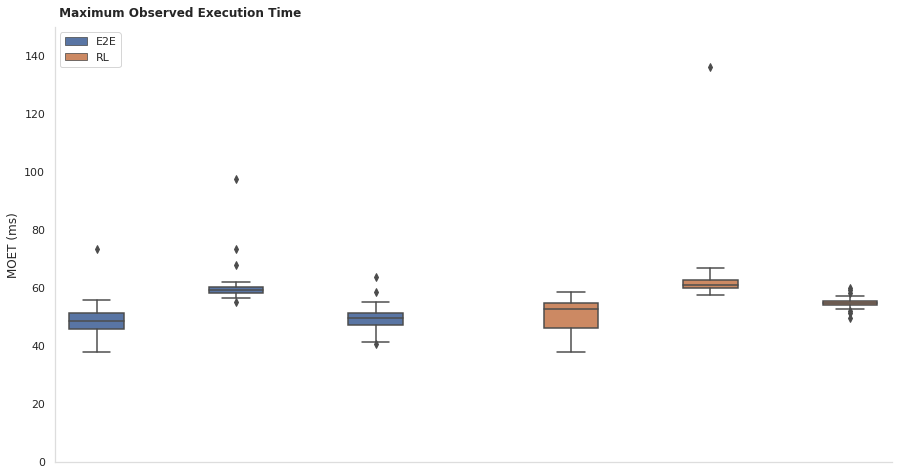

In [218]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=combined, x='Label',y='moet',hue='controller_type')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
#ax.set(xticklabels=['Dell Precision 7520','2','3','4','5','6'])
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)

plt.xlabel('')
plt.ylabel('MOET (ms)')
plt.title(' Maximum Observed Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')
plt.ylim(0,150)

### NVIDIA Jetson TX2

In [15]:
e2e_hw = pd.read_csv('e2e_hardware.csv',header=0)
rl_hw = pd.read_csv('rl_hardware_becnhmark.csv',header=0)
e2e_hw['Label'] = 'E2E'
rl_hw['Label'] = 'RL'
hardware_experiments = pd.concat([e2e_hw,rl_hw])

hardware_experiments = hardware_experiments.rename(columns={"wcet":"moet"})
hardware_experiments['moet'] = hardware_experiments['moet'] *1000
hardware_experiments['mean_reach_time'] = hardware_experiments['mean_reach_time'] *1000

hardware_experiments

,time_string,time_taken_lec,time_taken_safety_controller,total_time,moet,mean_reach_time,Label
0,23/10/2020/08:40:09,0.000000,9.17046,9.17048,42.455,10.01880,E2E
1,23/10/2020/09:00:34,0.000000,11.02590,11.02590,46.528,10.59690,E2E
2,23/10/2020/09:01:48,1.588660,0.07720,1.66586,30.773,23.52320,E2E
3,23/10/2020/09:03:25,0.000000,5.67329,5.67330,49.433,10.52020,E2E
4,23/10/2020/09:04:59,0.000000,4.64524,4.64524,49.017,10.13690,E2E
5,23/10/2020/09:06:27,0.000000,4.70444,4.70444,48.454,10.46610,E2E
6,23/10/2020/09:08:55,0.000000,5.50436,5.50437,45.826,11.38340,E2E
7,23/10/2020/09:09:42,0.000000,4.77674,4.77675,41.626,11.07170,E2E
8,23/10/2020/09:10:47,0.000000,5.14037,5.14039,44.315,11.12910,E2E
9,23/10/2020/09:11:51,0.000000,5.46726,5.46728,33.979,11.14070,E2E


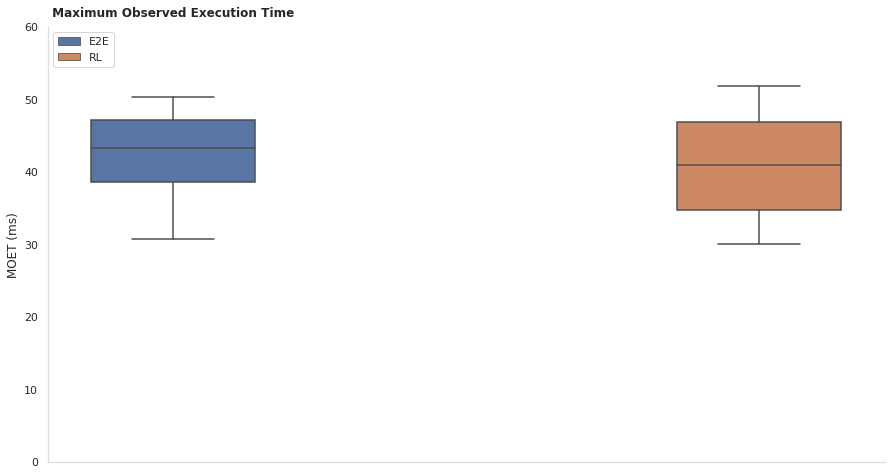

In [19]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=hardware_experiments, x='Label',y='moet',hue='Label')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)

plt.xlabel('')
plt.ylabel('MOET (ms)')
plt.title(' Maximum Observed Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')
_ = plt.ylim(0,60)

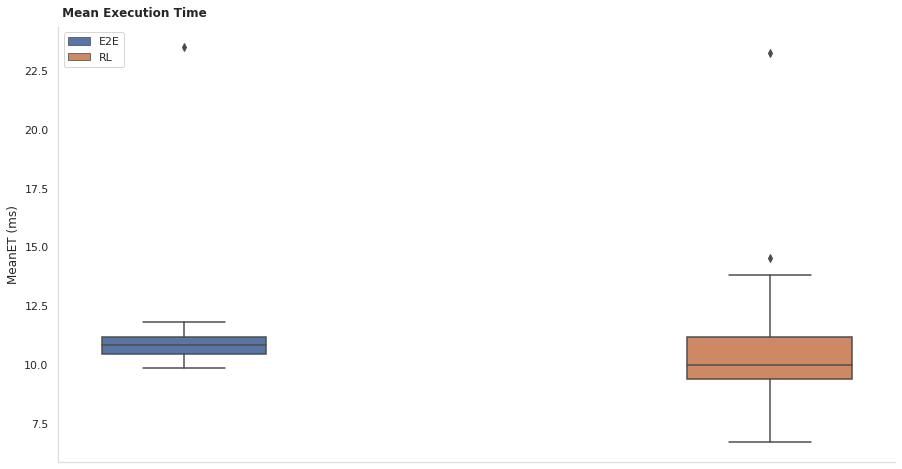

In [23]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=hardware_experiments, x='Label',y='mean_reach_time',hue='Label')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set(xticklabels=[])
sns.despine(left=False, bottom=False, right=True)
plt.xlabel('')
plt.ylabel('MeanET (ms)')
plt.title(' Mean Execution Time',loc='left',pad=10.0,fontweight="bold")
_= plt.legend(loc = 'upper left')